### *Importing modules*


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

### *Loading Dataset**


In [71]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

### *Shape of the Dataset*

In [72]:
data.shape

(569, 32)

### *Dropping Unnecessary Column*

In [73]:
data.drop(columns=['id'], inplace=True)

### *Shape of the dataset after removing unnecessary column*

In [74]:
data.shape

(569, 31)

### *Information about the dataset*

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diagnosis   569 non-null    object 
 1   feature_1   569 non-null    float64
 2   feature_2   569 non-null    float64
 3   feature_3   569 non-null    float64
 4   feature_4   569 non-null    float64
 5   feature_5   569 non-null    float64
 6   feature_6   569 non-null    float64
 7   feature_7   569 non-null    float64
 8   feature_8   569 non-null    float64
 9   feature_9   569 non-null    float64
 10  feature_10  569 non-null    float64
 11  feature_11  569 non-null    float64
 12  feature_12  569 non-null    float64
 13  feature_13  569 non-null    float64
 14  feature_14  569 non-null    float64
 15  feature_15  569 non-null    float64
 16  feature_16  569 non-null    float64
 17  feature_17  569 non-null    float64
 18  feature_18  569 non-null    float64
 19  feature_19  569 non-null    f

### *First Few Rows of the Dataset*

In [76]:
data.head()

,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### *Summary statistics of the dataset*


In [77]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### *To check any value present in the dataset*

In [78]:
data.isnull().sum()

diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

### *Distribution of Features in the Dataset*


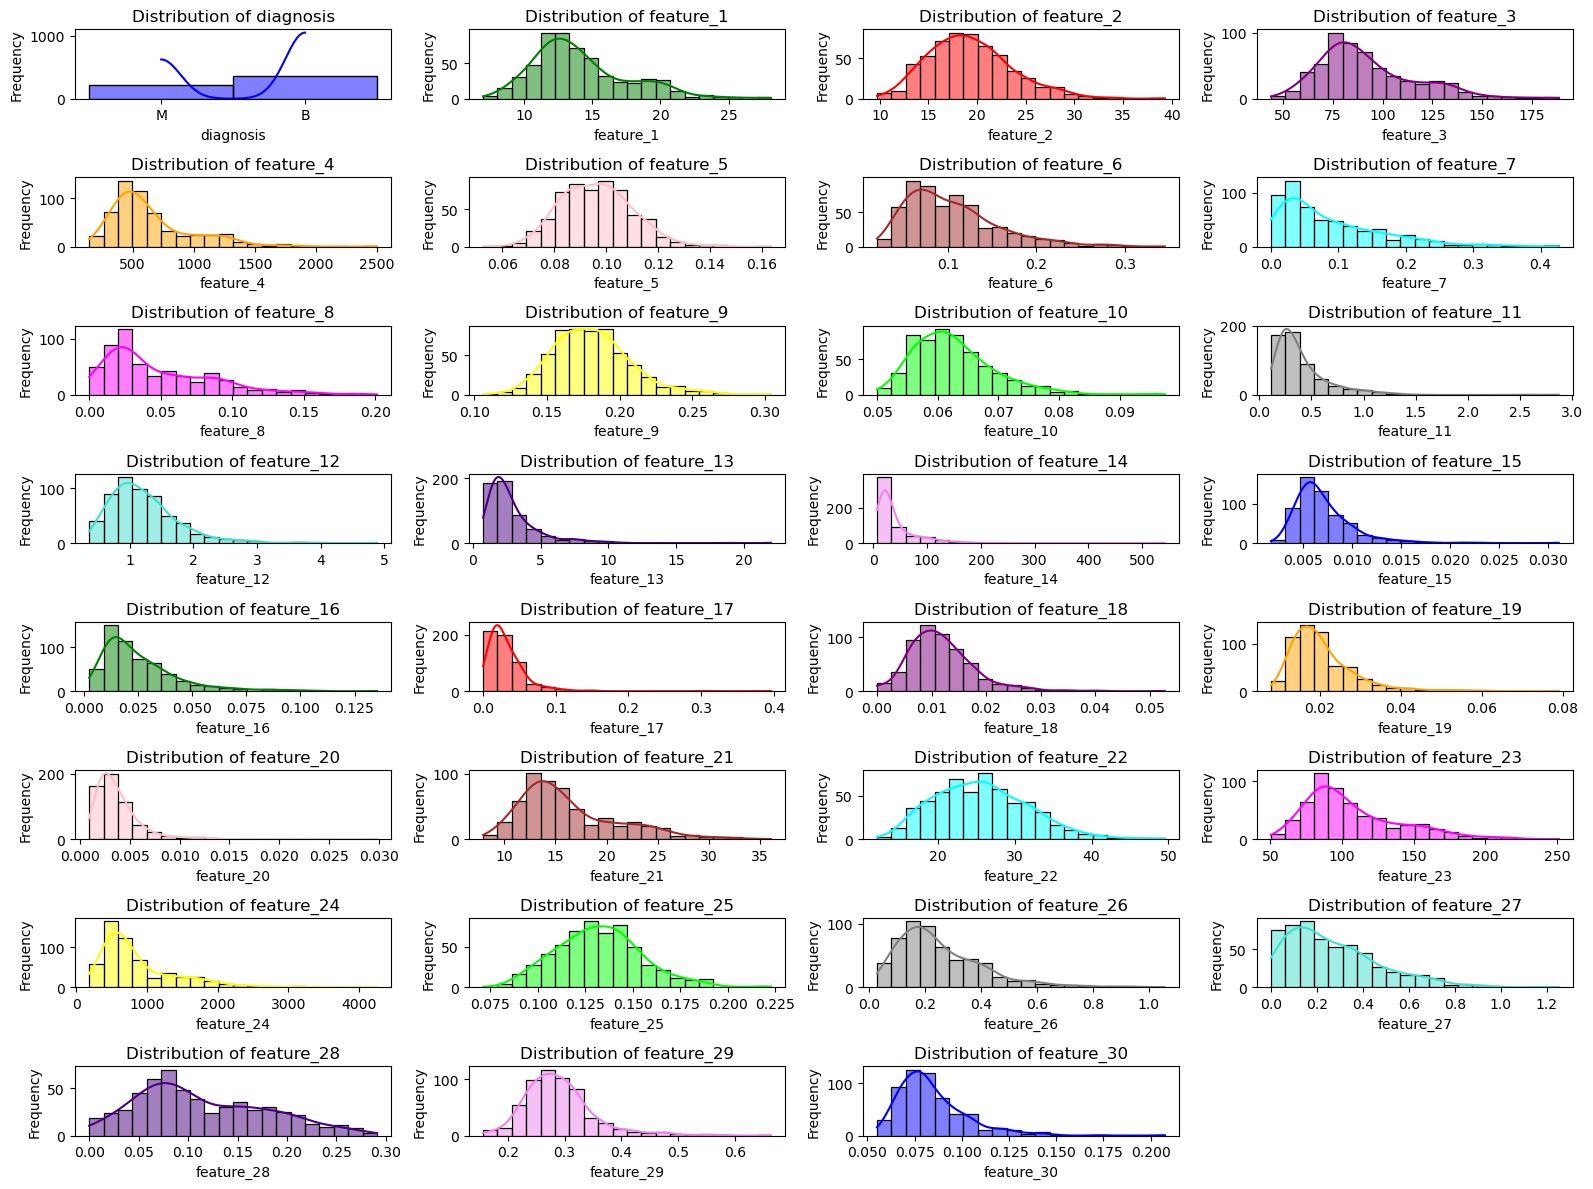

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of colors for each feature
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'lime', 'gray', 'turquoise', 'indigo', 'violet']

# Set the figure size
plt.figure(figsize=(16, 12))

# Loop through the columns and plot each feature's distribution
num_features = len(data.columns)  # Total number of features
cols = 4  # Number of columns for subplots
rows = (num_features // cols) + (1 if num_features % cols != 0 else 0)  # Calculate rows based on number of features

# Create subplots with the specified number of rows and columns
for i, column in enumerate(data.columns):
    plt.subplot(rows, cols, i + 1)  # Adjust layout to accommodate all features
    sns.histplot(data[column], kde=True, color=colors[i % len(colors)], bins=20)  # Use modulo for color cycling
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### *Feature Correlation Heatmap*


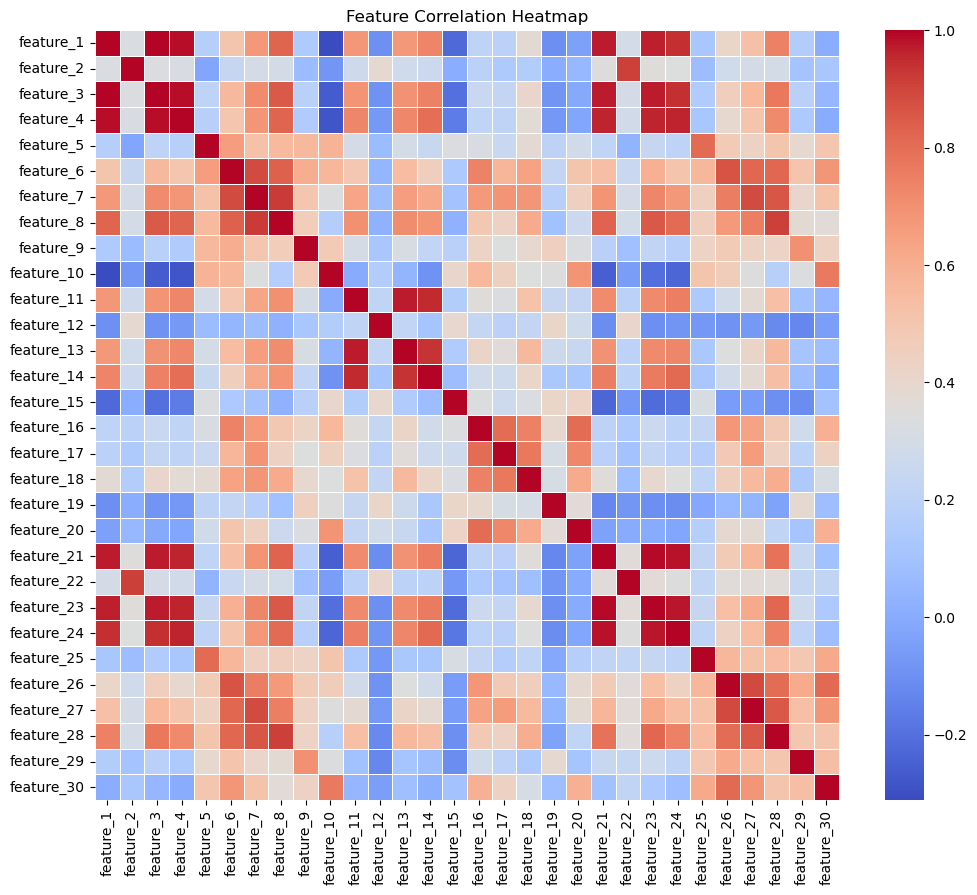

In [80]:
# Drop non-numeric columns (e.g., 'diagnosis')
data_numerical = data.drop(columns=['diagnosis'])

# Calculate the correlation matrix
correlation = data_numerical.corr()

# Plot the correlation heatmap without annotation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='coolwarm', annot=False, linewidths=0.5)  # annot=False removes the values
plt.title('Feature Correlation Heatmap')
plt.show()

### *Checking Outliers (IQR method)*


In [81]:
# Calculate the IQR for each numerical feature
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data_numerical < lower_bound) | (data_numerical > upper_bound)

# Calculate the count and percentage of outliers for each feature
outlier_counts = outliers.sum()
outlier_percentages = (outlier_counts / len(data_numerical)) * 100

# Create a DataFrame to display the results nicely
outlier_summary = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Percentage (%)': outlier_percentages
}).sort_values(by='Outlier Percentage (%)', ascending=False)


print("\nOutliers detected using IQR method:")
print(outlier_summary.to_string())



Outliers detected using IQR method:
            Outlier Count  Outlier Percentage (%)
feature_14             65               11.423550
feature_11             38                6.678383
feature_13             38                6.678383
feature_24             35                6.151142
feature_15             30                5.272408
feature_16             28                4.920914
feature_20             28                4.920914
feature_19             27                4.745167
feature_4              25                4.393673
feature_30             24                4.217926
feature_29             23                4.042179
feature_17             22                3.866432
feature_12             20                3.514938
feature_18             19                3.339192
feature_7              18                3.163445
feature_21             17                2.987698
feature_26             16                2.811951
feature_6              16                2.811951
feature_23   

### *Ploting boxplot for outliers*


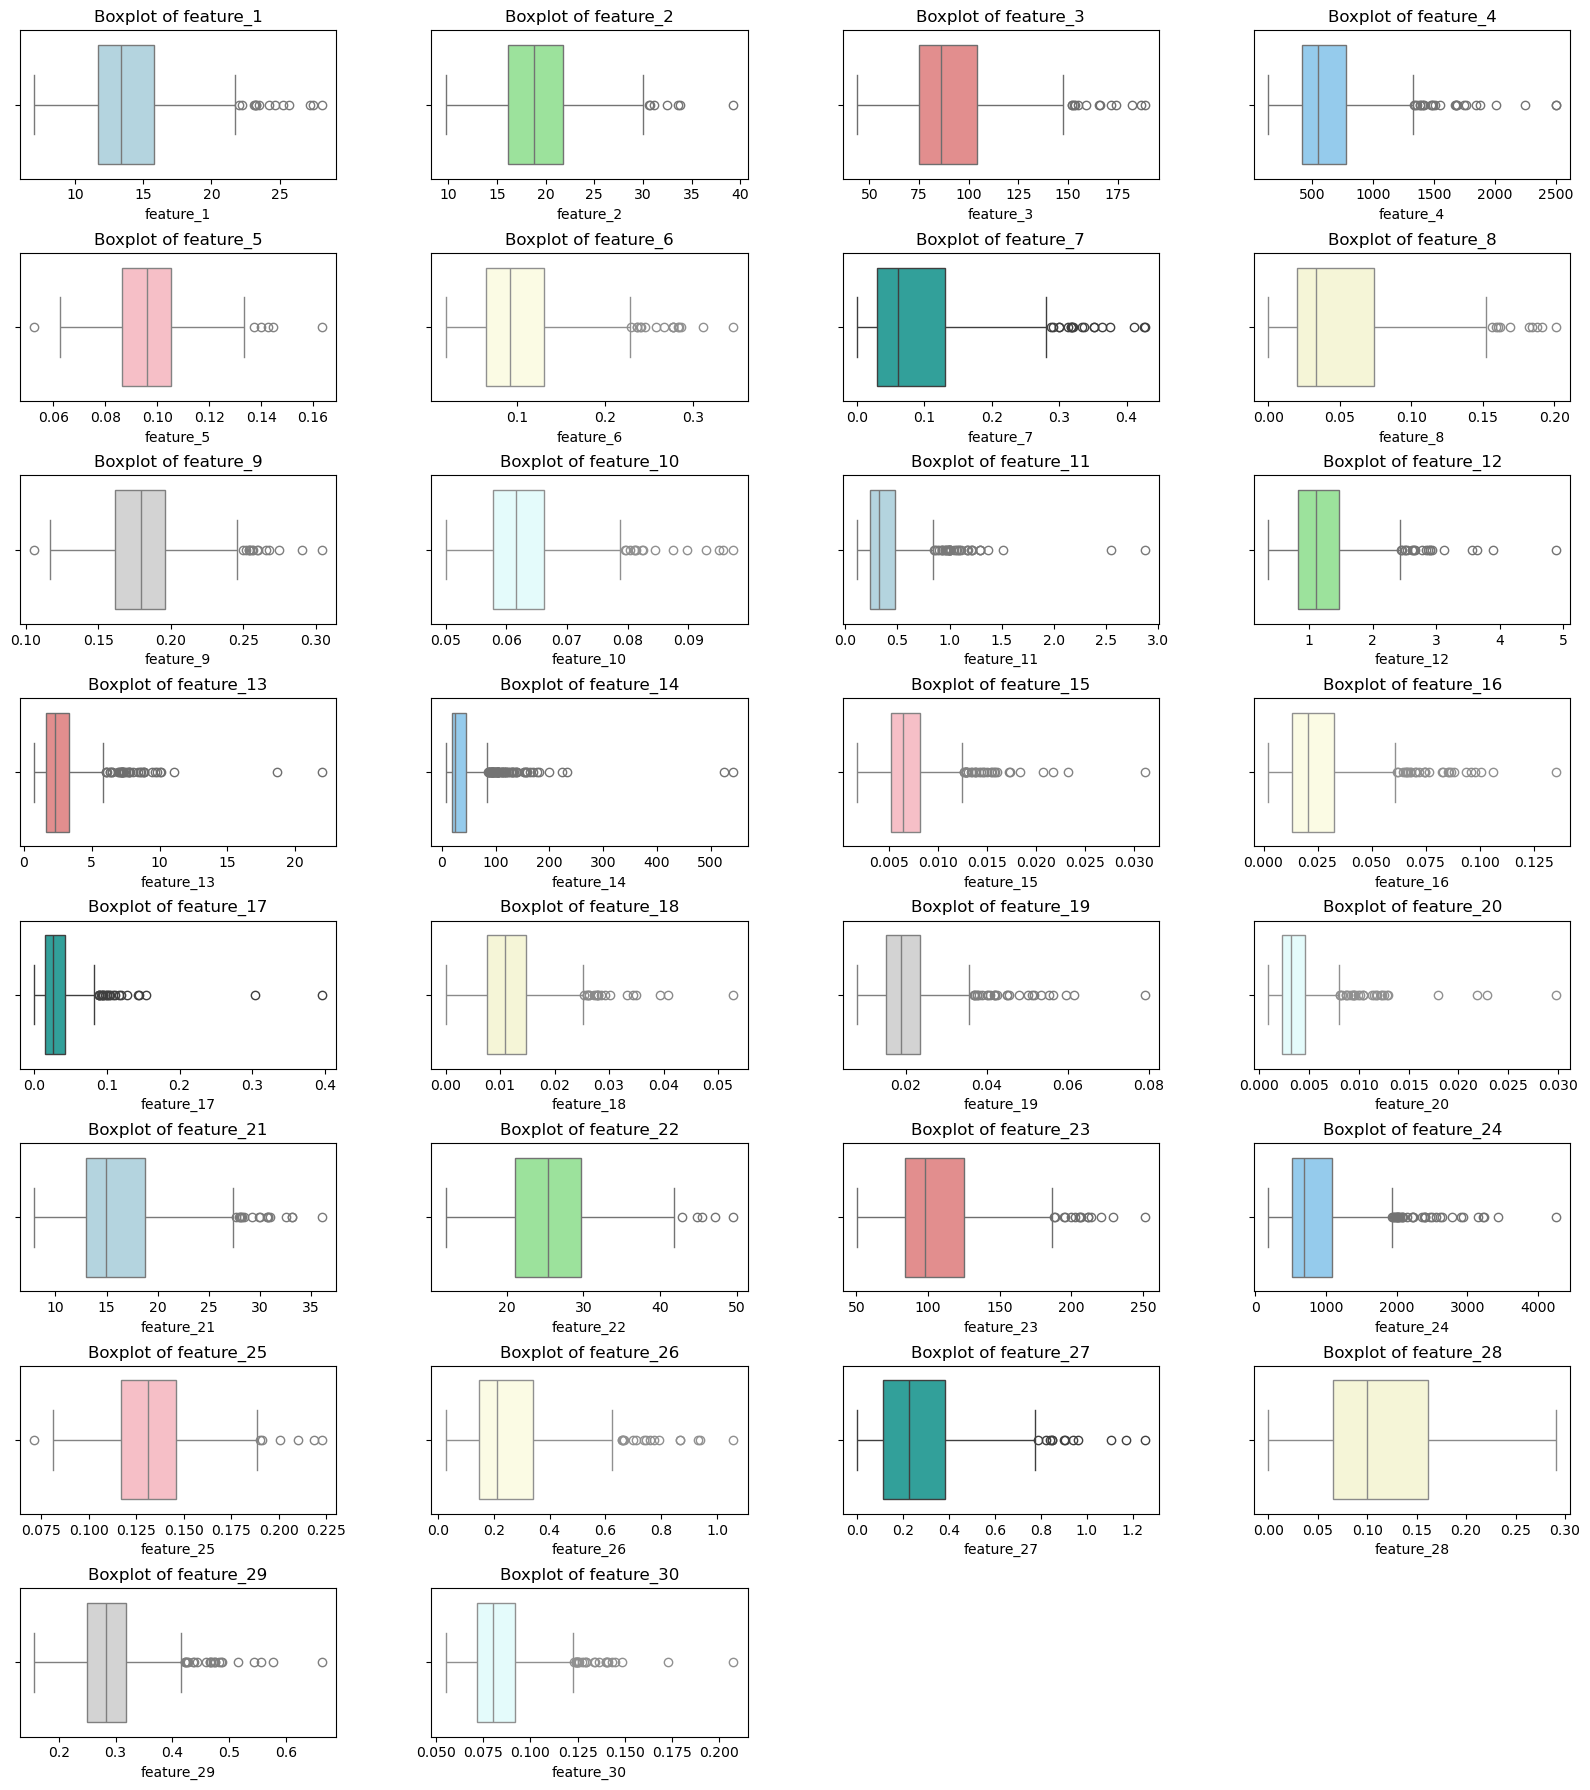

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 18))

# Define the number of rows and columns for the grid layout
n_cols = 4  # Number of columns for the layout
n_rows = (len(data_numerical.columns) // n_cols) + (len(data_numerical.columns) % n_cols > 0)  # Number of rows to fit all features

# List of colors to use for each box plot (you can extend the list if you have more features)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightseagreen', 'lightgoldenrodyellow', 'lightgray', 'lightcyan']

# Loop through each numerical feature and plot a box plot
for i, column in enumerate(data_numerical.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust layout for multiple features
    sns.boxplot(x=data_numerical[column], color=colors[i % len(colors)])  # Use a different color for each plot
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.tight_layout()  # To adjust the space between subplots

# Adjust layout to prevent overlap and make it visually appealing
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Add more space between subplots
plt.show()


### *Target Column is diagnosis*

In [83]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### *Distribution of diagnosis*

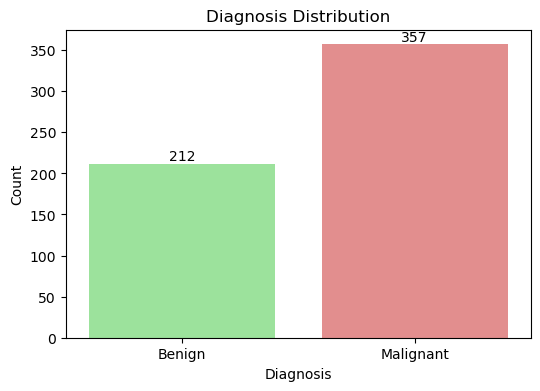

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot with a custom color palette
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette=['lightgreen', 'lightcoral'], legend=False)

# Add count values on top of the bars
for p in ax.patches:
    count = p.get_height()  # Height of the bar (count of observations)
    ax.annotate(f'{int(count)}',  # Display count value
                (p.get_x() + p.get_width() / 2., count),  # Position of the annotation
                ha='center', va='bottom', fontsize=10, color='black')  # Alignment and style

# Customize the plot
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


### *Mapping 'Diagnosis' Column to Binary Values**

In [85]:
# Map the 'diagnosis' column to binary values
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

### *Spliting of dataset*

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

### *Applying SMOTE to Balance the Training Data*

In [87]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

### *Initializing AdaBoost with a Decision Tree Base Estimator*


In [88]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)


### *Training the dataset*



In [89]:
adaboost.fit(X_train_sm, y_train_sm)
y_pred = adaboost.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### *Classification Report without Hyperparameter Tuning*


In [90]:
# Print classification report
print("Classification Report (Without Hyperparameter Tuning):")
print(classification_report(y_test, y_pred))

# Calculate and print final accuracy
final_accuracy_without_tuning = accuracy_score(y_test, y_pred)
print(f"Final Accuracy (Without Hyperparameter Tuning): {final_accuracy_without_tuning:.2f}")

Classification Report (Without Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Final Accuracy (Without Hyperparameter Tuning): 0.97


### *Confusion Matrix Without Hyperparameter Tuning*

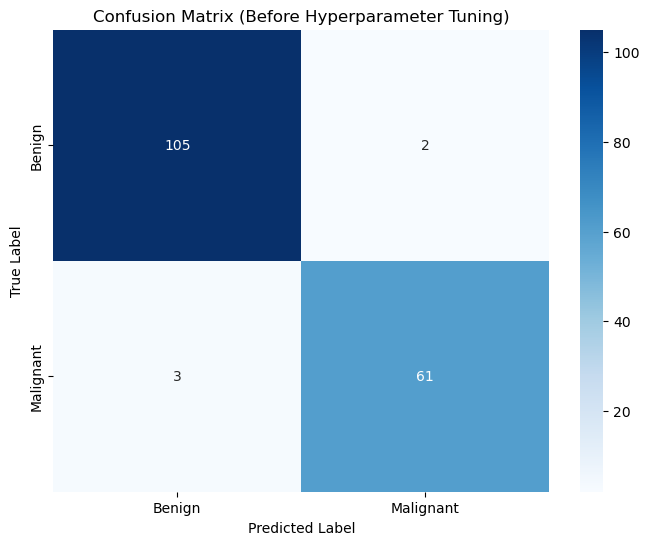

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix before Hyperparameter Tuning
conf_matrix_before = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (Before Hyperparameter Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### *Hyperparameter Tuning*

In [92]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sm, y_train_sm)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Li

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

### *Classification Report with Hyperparameter Tuning*

In [93]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Print classification report
print("Classification Report (With Hyperparameter Tuning):")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print final accuracy
final_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Final Accuracy (With Hyperparameter Tuning): {final_accuracy:.2f}")


Classification Report (With Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Final Accuracy (With Hyperparameter Tuning): 0.98


### *Confusion Matrix After Hyperparameter Tuning*

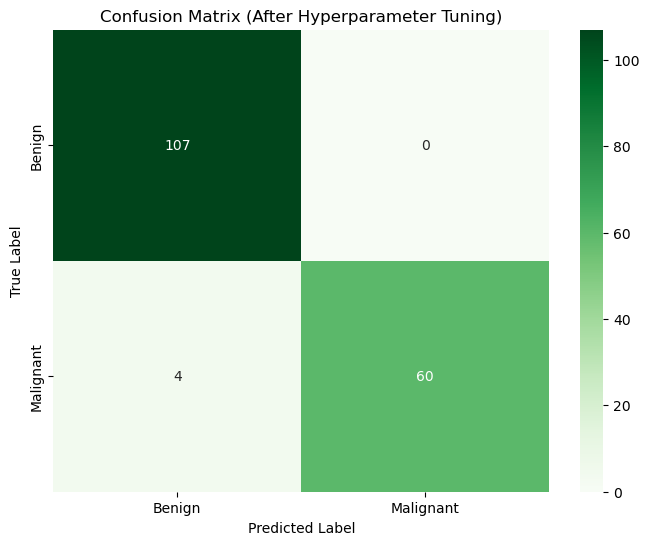

In [94]:
# Confusion Matrix after Hyperparameter Tuning
conf_matrix_after = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix (After Hyperparameter Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### *ROC Curve*

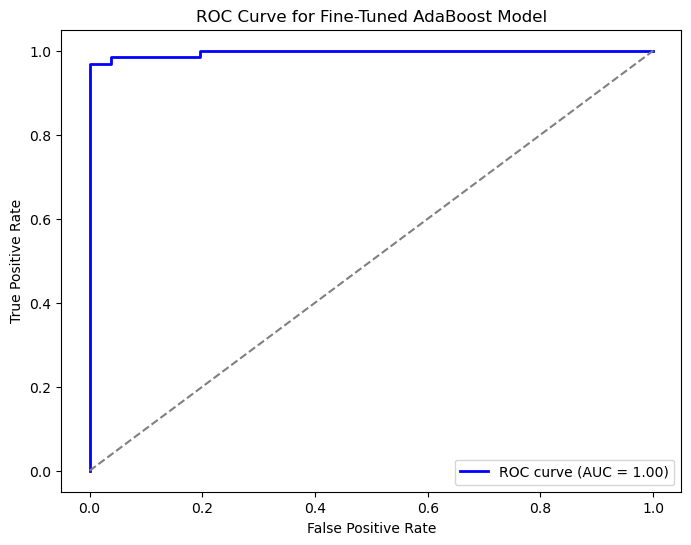

In [95]:
from sklearn.metrics import roc_curve, auc
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fine-Tuned AdaBoost Model')
plt.legend(loc='lower right')
plt.show()

### *Learning Curve*

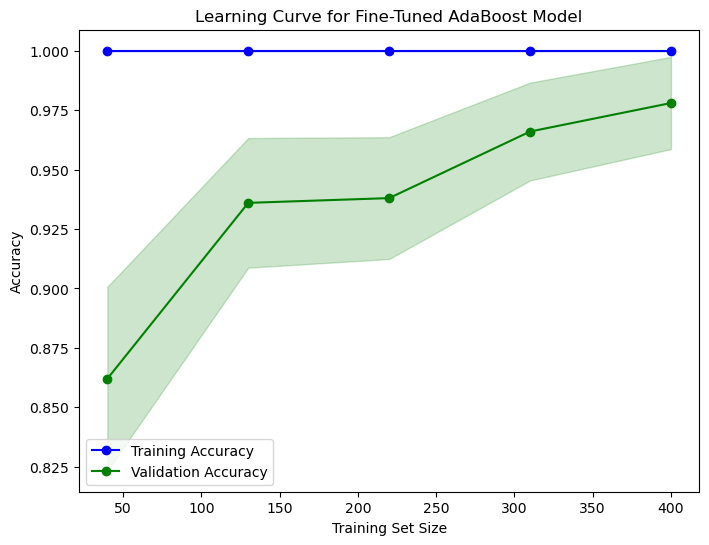

In [96]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_sm, y_train_sm, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Validation Accuracy')

# Add shaded regions to show the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Fine-Tuned AdaBoost Model')
plt.legend(loc='best')
plt.show()

### *Extracting Feature Importances from the Trained AdaBoost Model*


In [97]:
importances = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

### *Visualizing Feature Importances of the Fine-Tuned AdaBoost Model*


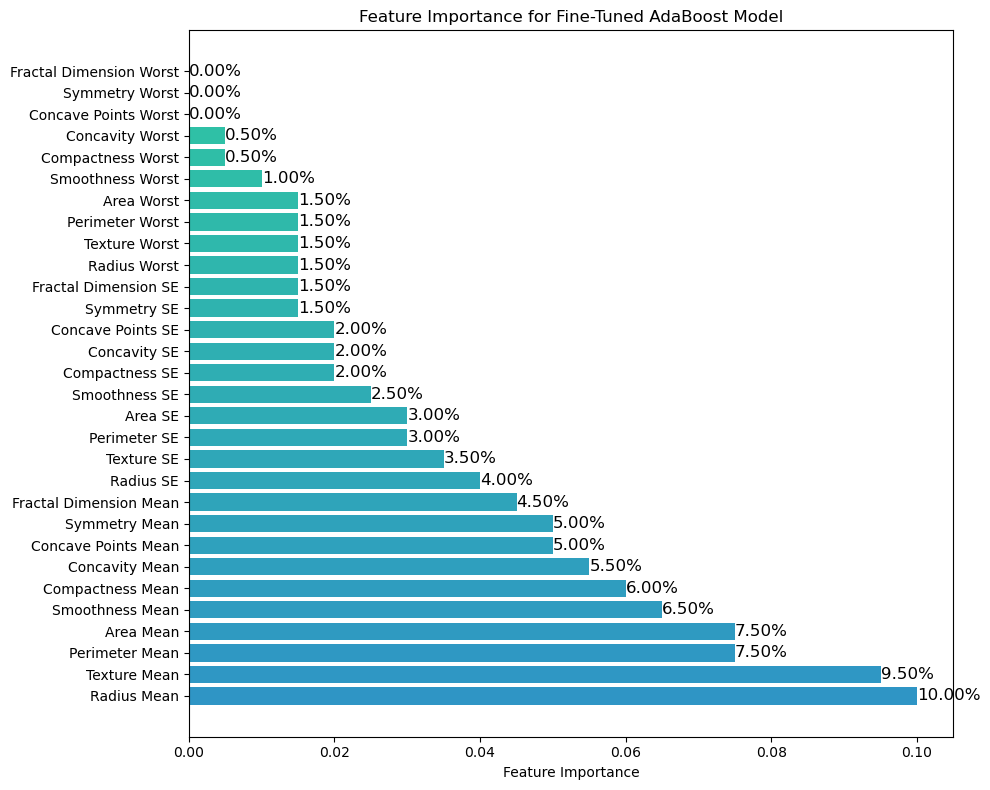

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Assume feature_importance_df is already created and sorted
# Replace 'Feature 1', 'Feature 2', etc., with actual feature names
actual_feature_names = [
    "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
    "Compactness Mean", "Concavity Mean", "Concave Points Mean", "Symmetry Mean", "Fractal Dimension Mean",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE",
    "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE",
    "Radius Worst", "Texture Worst", "Perimeter Worst", "Area Worst", "Smoothness Worst",
    "Compactness Worst", "Concavity Worst", "Concave Points Worst", "Symmetry Worst", "Fractal Dimension Worst"
]

# Map the new names to the 'Feature' column
feature_importance_df['Feature'] = actual_feature_names

# Create a custom colormap for coral blue-green gradient
custom_colors = LinearSegmentedColormap.from_list("CoralBlueGreen", ["#2F95C5", "#2FC5A2"], N=len(feature_importance_df))

# Generate a colormap
colors = [custom_colors(i / len(feature_importance_df)) for i in range(len(feature_importance_df))]

# Plot the feature importances with updated names
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Fine-Tuned AdaBoost Model')

# Annotate the bars with percentage values
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value*100:.2f}%', va='center', color='black', fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [99]:
most_important_feature = feature_importance_df.iloc[0]
print(f"The most important feature is: {most_important_feature['Feature']} with an importance of {most_important_feature['Importance']*100:.2f}%")

The most important feature is: Radius Mean with an importance of 0.00%
